# Sobel算子、Scharr算子与Laplacian算子

# 1. Sobel算子

① Sobel算子函数：cv2.Sobel(src, ddepth, dx, dy, ksize)，返回值为Sobel算子处理后的图像。

 - ddepth：图像的深度
 - dx 和 dy 分别表示水平和竖直方向
 - ksize 是 Sobel 算子的大小
 
② 靠近最近点的左右和上下的权重最高，所以为±2。

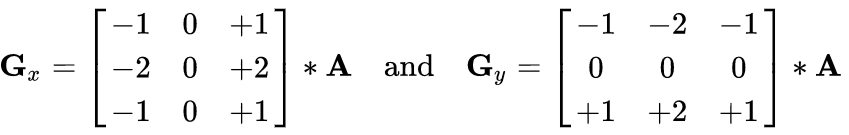

## 1.1 圆形处理(例)

In [1]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline   

In [2]:
pie = cv2.imread('01_Picture/06_pie.png') # 读取图像
cv2.imshow('img',pie)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
# 梯度就是边界点，左边右边不一样
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
# 白到黑是整数，黑到白是负数了，所有的负数会被截断成 0，所以要取绝对值
sobelx = cv2.Sobel(pie,cv2.CV_64F,1,0,ksize=3) # 1,0 表示只算水平方向梯度
cv_show(sobelx,'sobelx')

In [4]:
sobelx = cv2.Sobel(pie,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx) # 取负数时，取绝对值
cv_show(sobelx,'sobelx')

sobely = cv2.Sobel(pie,cv2.CV_64F,0,1,ksize=3) # 1,0 只算 y 方向梯度
sobely = cv2.convertScaleAbs(sobely) # 取负数时，取绝对值
cv_show(sobely,'sobely')

In [5]:
# 计算 x 和 y 后，再求和
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0) # 0是偏置项
cv_show(sobelxy,'sobelxy')

In [6]:
# 不建议直接计算,还有重影
sobelxy = cv2.Sobel(pie,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy)
cv_show(sobelxy,'sobelxy')

## 1.2 人照处理(例)

In [7]:
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show(img,'img')

In [8]:
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

In [9]:
# 整体计算有重影和模糊，不建议整体计算
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelxy = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy)
cv_show(sobelxy,'sobelxy')

# 2. Scharr算子

① 对结果的差异更敏感一些。

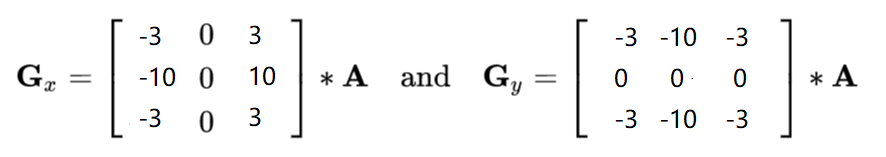

# 3. Laplacian算子

① Laplacian算子用的是二阶导，对噪音点更敏感一些。

② 如果中心点是边界，它与周围像素点差异的幅度会较大，Laplacian算子根据此特点可以把边界识别出来。

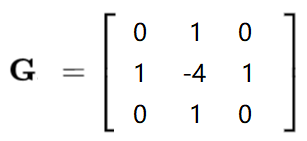

# 4. 各个算子区别

In [10]:
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show(img,'img')

In [11]:
# 不同算子的差异
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)   

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)

laplacian = cv2.Laplacian(img,cv2.CV_64F) # 没有 x、y，因为是求周围点的比较
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((sobelxy,scharrxy,laplacian))
cv_show(res,'res')